In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from backtest_functions_v2 import *

In [11]:
df = pd.read_parquet("../data/full_dataset_feature_engineering_v2.parquet")

df = df[['news_count', 'tanalysis_absa', 'economy_absa',
         'regulation_absa', 'technology_absa', 'adoption_absa',
         'cybersecurity_absa', 'return_forward']]

Overall Annual Return: 55.04%
Overall Annual Sharpe Ratio: 2.2683
Maximum Drawdown: -12.17 %
Alpha: 0.2511
Beta: 0.2524

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2024       0.550415    0.202359     0.252422      0.224032       2.268288


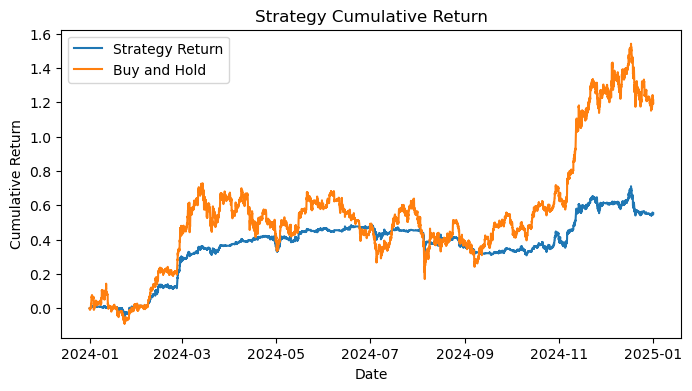

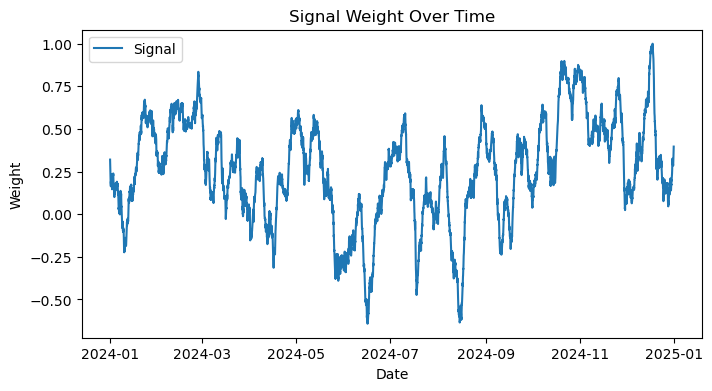

In [12]:
cols = ['tanalysis_absa', 'economy_absa', 'regulation_absa', 'technology_absa', 'adoption_absa', 'cybersecurity_absa']
df['absa_mean'] = df[cols].mean(axis=1)
df.drop(columns=cols, inplace=True)

# signal smoothing
df['signal'] = df['absa_mean'].ewm(span=100).mean()

# signal scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df['signal'] = scaler.fit_transform(df['signal'].values.reshape(-1, 1))

df = df[df.index >= '2024-01-01']
df = df[df.index < '2025-01-01']

run_backtest(df, freq='h')